### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The task category, i.e in which condition the words fall is the independent variable. Time taken to identify and name the ink colors of the words is dependent variable.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

In [1]:
mu1=u'\u03BC1'
mu2=u'\u03BC2'
ne=u"\u2260"
print(mu1,"=",mu2)
print (mu1,ne,mu2)

μ1 = μ2
μ1 ≠ μ2


Null Hypothesis:  There is no difference in the means between the time taken for the two category conditions
H0 : μ1 = μ2
Alternate Hypothesis: There is difference in the means of the time taken for the two category conditions
H1 : μ1 ≠ μ2

#We do not write which condition is greater or lesser here, because we do not know much information at this stage. Based on normality, we perform t test or wilcox test

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

--write answer here--

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('ggplot')
# Enable inline viewing of graphs
%matplotlib inline

In [3]:
df = pd.read_csv('stroopdata.csv')


In [4]:
#decricptive statistics
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [5]:
diff=-df['Incongruent']+df['Congruent']

In [6]:
diff.describe()

count    24.000000
mean     -7.964792
std       4.864827
min     -21.919000
25%     -10.258500
50%      -7.666500
75%      -3.645500
max      -1.950000
dtype: float64

When we subtract the time taken by the two tasks for each observation we observe that the means and other statistics are negative, indicating that Incongruent data values are higher than the congruent data values.

We see that mean of Incongruent is greater than mean of the Congruent

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

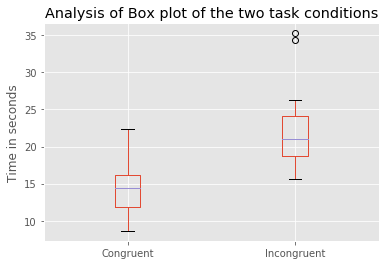

In [7]:
# Build the visualizations here
df.plot(title='Analysis of Box plot of the two task conditions', kind='box')
ylabel = plt.ylabel('Time in seconds')

From the above box plot we observe that the range of the Incrongruent condition is more than the congruent condition. Also, the mean is higher for the incongruent condition

In [8]:
y=list(range(1,25))

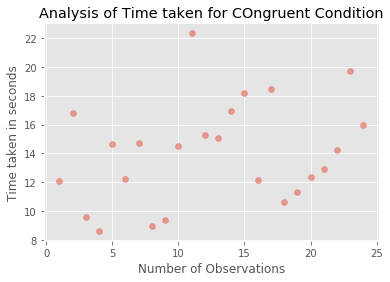

In [9]:
plt.scatter(y,df['Congruent'], alpha=0.5)
plt.title('Analysis of Time taken for COngruent Condition')
plt.xlabel('Number of Observations')
plt.ylabel('Time taken in seconds')
plt.show()

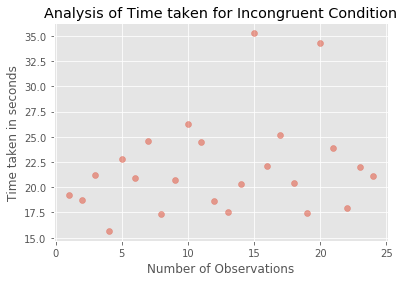

In [10]:
plt.scatter(y,df['Incongruent'], alpha=0.5)
plt.title('Analysis of Time taken for Incongruent Condition')
plt.xlabel('Number of Observations')
plt.ylabel('Time taken in seconds')
plt.show()

From the above two plots we see that highest time taken is observed in the Incongruent condition.Also, if we taken an average more time in majority of the conditions is taken  for the incongruent condition 


(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [11]:
# Perform the statistical test here
#checking if the dataframe columns are normal
k1, p1 = stats.normaltest(df['Congruent'])
k2,p2 = stats.normaltest(df['Incongruent'])
alpha=0.05
if(p1<alpha):
    print ("p1 Normal")
if(p2<alpha):
    print ("p2 Normal")  


p2 Normal


Here, we take our confidence interval as 95%, which means alpha value is 0.05
We see that both the columns are not normalised.So we perform wilcox test  

In [12]:
t,p=stats.wilcoxon(df['Congruent'],df['Incongruent'],zero_method='wilcox')

In [13]:
if(p<alpha):
    print("true")

true


When wilconxon test is performed, we observe that the p value is way less than alpha,thus we reject the null hypothesis that the means of time taken for the two conditions are same.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--